In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv("C:\\Users\ADMIN\\Desktop\\Clustering---Customer-Behaviour-Pattern-main\\marketing_campaign.csv")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data=data.drop(["ID","Z_CostContact","Z_Revenue"], axis=1)
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,0,0,0,0,0,0


In [8]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [9]:
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [10]:
##data['Income'].median()=== 51381.5

In [11]:
data["Income"]=data['Income'].replace(np.NaN, data['Income'].median())

In [12]:
data.head(12)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0
5,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,...,4,10,6,0,0,0,0,0,0,0
6,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,...,3,7,6,0,0,0,0,0,0,0
7,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,...,0,4,8,0,0,0,0,0,0,0
8,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,...,0,2,9,0,0,0,0,0,0,1
9,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,...,0,0,20,1,0,0,0,0,0,0


In [13]:
data.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [14]:
data[data.duplicated()].shape

(182, 26)

In [15]:
df=data.drop_duplicates()
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,...,1,3,6,0,0,0,0,0,0,0
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,0,0,0,0,0,0


In [16]:
new_df=df.assign(l_year=2014)
new_df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,l_year
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,4,7,0,0,0,0,0,0,1,2014
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,2,5,0,0,0,0,0,0,0,2014
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,10,4,0,0,0,0,0,0,0,2014
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,4,6,0,0,0,0,0,0,0,2014
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,6,5,0,0,0,0,0,0,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,...,3,6,0,0,0,0,0,0,0,2014
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,4,5,0,0,0,0,0,0,0,2014
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,13,6,0,1,0,0,0,0,0,2014
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,10,3,0,0,0,0,0,0,0,2014


In [17]:
new_df["Age"]=new_df["l_year"]-new_df["Year_Birth"]
new_df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,l_year,Age
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,1,2014,57
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,0,2014,60
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,0,2014,49
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,0,2014,30
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,0,2014,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,...,6,0,0,0,0,0,0,0,2014,37
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,0,2014,47
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,0,2014,33
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,3,0,0,0,0,0,0,0,2014,58


In [18]:
df_n = new_df.drop(["Year_Birth","l_year"], axis=1)
df_n 

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,...,4,7,0,0,0,0,0,0,1,57
1,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,...,2,5,0,0,0,0,0,0,0,60
2,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,...,10,4,0,0,0,0,0,0,0,49
3,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,...,4,6,0,0,0,0,0,0,0,30
4,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,...,6,5,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,...,3,6,0,0,0,0,0,0,0,37
2235,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,...,4,5,0,0,0,0,0,0,0,47
2237,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,...,13,6,0,1,0,0,0,0,0,33
2238,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,...,10,3,0,0,0,0,0,0,0,58


- Here we calculate age of customer till the year 2014 coz we have entries of 2013 and 2014.

In [19]:
df_n.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,52346.406220,0.445578,0.509232,48.951895,303.921769,26.234694,167.704568,37.329446,27.176871,43.873178,...,5.770651,5.319728,0.073372,0.076774,0.071914,0.065598,0.012634,0.009718,0.152089,45.212828
std,25377.819022,0.537556,0.546489,28.999189,336.528217,39.750728,228.303238,54.657215,41.714004,52.126598,...,3.239113,2.439907,0.260810,0.266297,0.258409,0.247638,0.111714,0.098124,0.359195,11.973898
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,35701.750000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
75%,68242.500000,1.000000,1.000000,74.000000,504.000000,33.000000,229.500000,50.000000,33.750000,56.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,121.000000


## Univariate Analysis

### General Analysis of People 

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

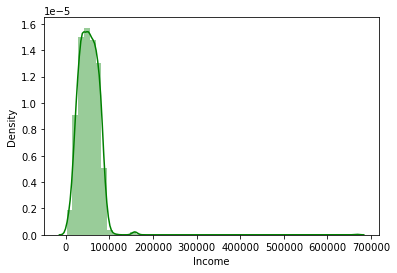

In [20]:
sns.distplot(df_n["Income"], kde= True, color="g" )

- There are very few people who are earning more than 1 lac. almost 99% of the peoples income is in between 0 to 1 lac

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

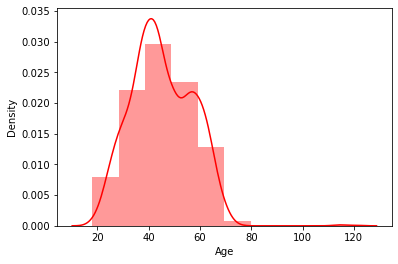

In [21]:
sns.distplot(df_n["Age"], kde= True, color="r", bins=10 )

Most of the people are in the age between 30 to 60

Graduation    1030
PhD            450
Master         341
2n Cycle       188
Basic           49
Name: Education, dtype: int64

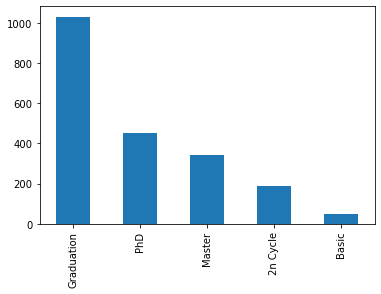

In [22]:
df_n["Education"].value_counts().plot(kind = 'bar')
df_n["Education"].value_counts()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Married     795
Together    521
Single      448
Divorced    216
Widow        71
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

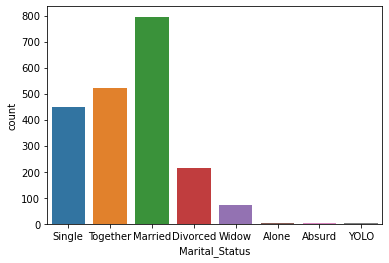

In [23]:
sns.countplot(df_n["Marital_Status"])
df_n["Marital_Status"].value_counts()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    1184
1     831
2      43
Name: Kidhome, dtype: int64

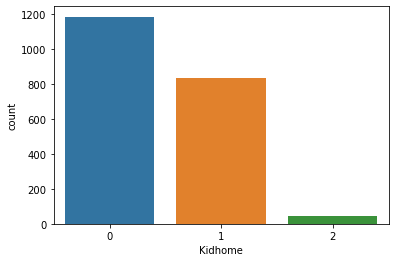

In [24]:
sns.countplot(df_n["Kidhome"])
df_n["Kidhome"].value_counts()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    1060
1     948
2      50
Name: Teenhome, dtype: int64

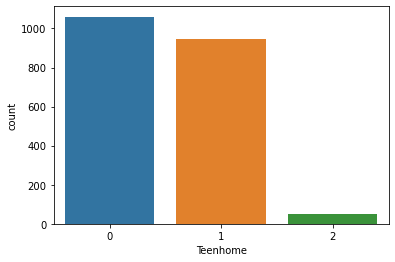

In [25]:
sns.countplot(df_n["Teenhome"])
df_n["Teenhome"].value_counts()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    2038
1      20
Name: Complain, dtype: int64

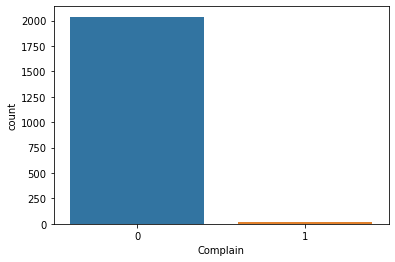

In [26]:
sns.countplot(df_n["Complain"])
df_n["Complain"].value_counts()

### Analysis of Products

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MntWines', ylabel='Density'>

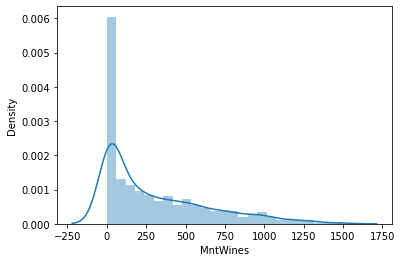

In [27]:
sns.distplot(df_n["MntWines"], bins=25)

        

- Maximum no of customers spent less than 500$ on wines in last two years

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MntFruits', ylabel='Density'>

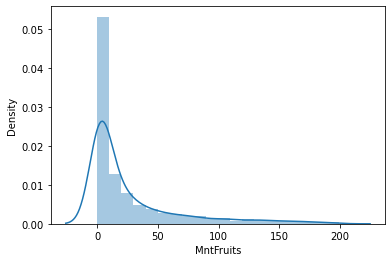

In [28]:
sns.distplot(df_n['MntFruits'], kde=True, bins=20)


- Very few pwople spend more than 100 dollar on fruits, where as most of the people spent 0 to 100 $ in last two years 

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MntMeatProducts', ylabel='Density'>

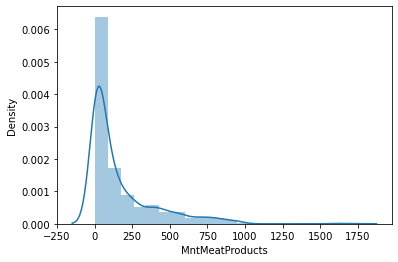

In [29]:
sns.distplot(df_n['MntMeatProducts'], kde=True, bins=20)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MntFishProducts', ylabel='Density'>

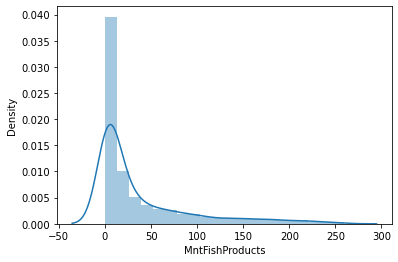

In [30]:
sns.distplot(df_n['MntFishProducts'], kde=True, bins=20)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MntSweetProducts', ylabel='Density'>

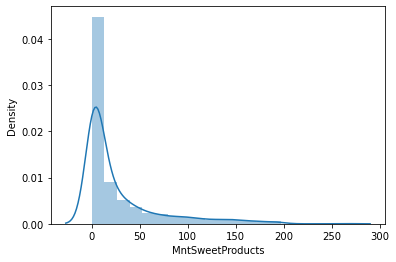

In [31]:
sns.distplot(df_n['MntSweetProducts'], kde=True, bins=20)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MntGoldProds', ylabel='Density'>

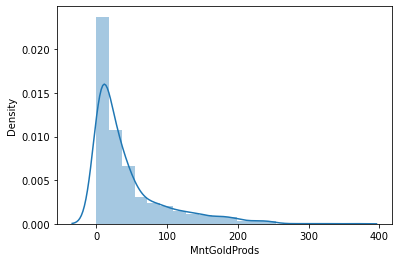

In [32]:
sns.distplot(df_n['MntGoldProds'], kde=True, bins=20)

##### Most of the customers spent more money on wine and meat products as comapaired to Fruits, Fish, Sweet and Gold products

### Analysis of Promotions

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    1923
1     135
Name: AcceptedCmp1, dtype: int64

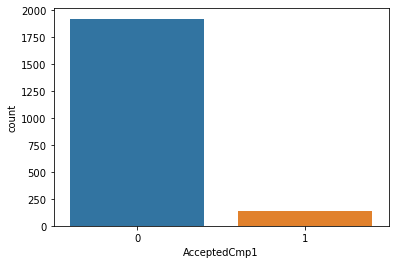

In [33]:
sns.countplot(df_n["AcceptedCmp1"])
df_n['AcceptedCmp1'].value_counts()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    2032
1      26
Name: AcceptedCmp2, dtype: int64

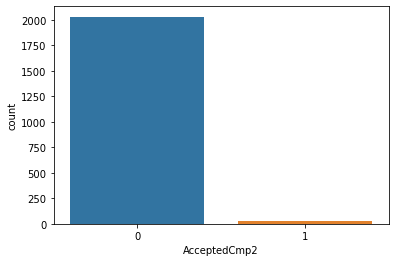

In [34]:
sns.countplot(df_n["AcceptedCmp2"])
df_n['AcceptedCmp2'].value_counts()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    1907
1     151
Name: AcceptedCmp3, dtype: int64

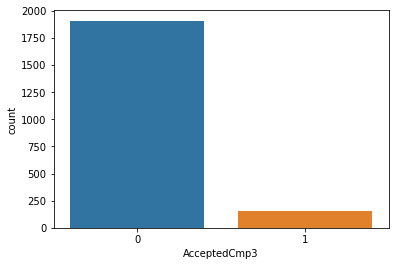

In [35]:
sns.countplot(df_n["AcceptedCmp3"])
df_n['AcceptedCmp3'].value_counts()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    1900
1     158
Name: AcceptedCmp4, dtype: int64

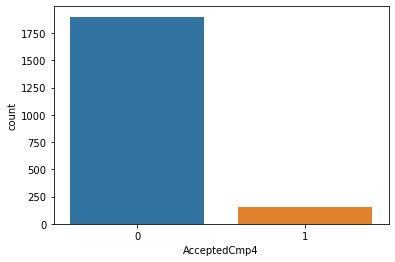

In [36]:
sns.countplot(df_n["AcceptedCmp4"])
df_n['AcceptedCmp4'].value_counts()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    1910
1     148
Name: AcceptedCmp5, dtype: int64

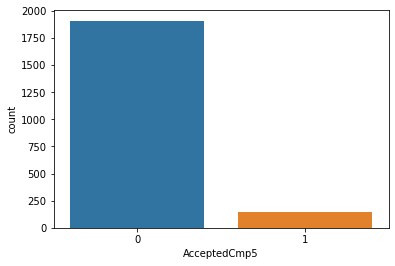

In [37]:
sns.countplot(df_n["AcceptedCmp5"])
df_n['AcceptedCmp5'].value_counts()

##### Most of the customers accepted offer accepted offer in 3rd, 4th and 5th campaign as compaired to 1st and second

### Analysis of Places

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


7     359
6     311
8     310
5     260
4     201
3     191
2     183
1     140
9      80
0      11
20      3
10      3
19      2
14      2
17      1
13      1
Name: NumWebVisitsMonth, dtype: int64

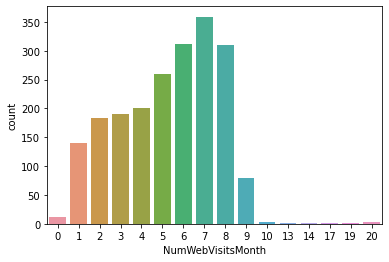

In [38]:
sns.countplot(df_n['NumWebVisitsMonth'])
df_n['NumWebVisitsMonth'].value_counts()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2     343
1     323
3     310
4     253
5     202
6     191
7     144
8      94
9      66
0      45
11     42
10     41
27      2
25      1
23      1
Name: NumWebPurchases, dtype: int64

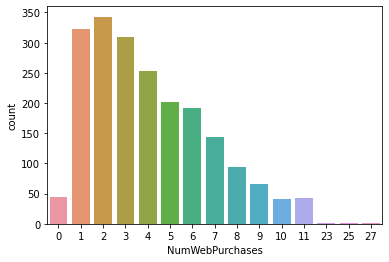

In [39]:
sns.countplot(df_n['NumWebPurchases'])
df_n['NumWebPurchases'].value_counts()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0     537
1     453
2     259
3     174
4     168
5     129
6     110
7      72
8      52
10     44
9      38
11     18
28      3
22      1
Name: NumCatalogPurchases, dtype: int64

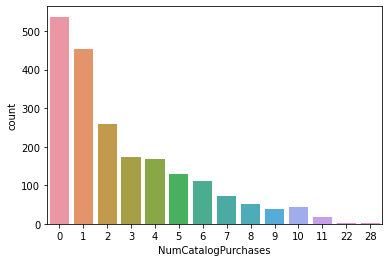

In [40]:
sns.countplot(df_n['NumCatalogPurchases'])
df_n['NumCatalogPurchases'].value_counts()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3     448
4     295
2     207
5     197
6     164
8     136
7     133
10    118
9      99
12     93
13     75
11     71
0      15
1       7
Name: NumStorePurchases, dtype: int64

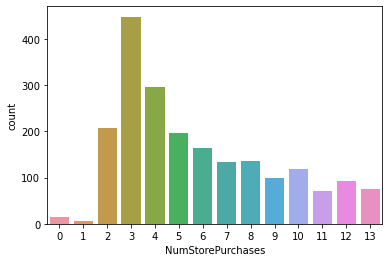

In [41]:
sns.countplot(df_n['NumStorePurchases'])
df_n['NumStorePurchases'].value_counts()

##### Most of the customers visited website for multiple times.Most of the customers prefered store purchase than web purchase and catlog purchase.

## Bi-Variate Analysis 

In [42]:
df_n['Expenses'] = df_n['MntWines'] + df_n['MntFruits'] + df_n['MntMeatProducts'] + df_n['MntFishProducts'] + df_n['MntSweetProducts'] + df_n['MntGoldProds']
df_n['Campaign'] = df_n['AcceptedCmp1'] + df_n['AcceptedCmp2'] + df_n['AcceptedCmp3'] + df_n['AcceptedCmp4'] + df_n['AcceptedCmp5']+df_n["Response"]
df_n

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Expenses,Campaign
0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,1,57,1617,1
1,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,0,60,27,0
2,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,...,0,0,0,0,0,0,0,49,776,0
3,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,...,0,0,0,0,0,0,0,30,53,0
4,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,...,0,0,0,0,0,0,0,33,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,...,0,0,0,0,0,0,0,37,62,0
2235,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,...,0,0,0,0,0,0,0,47,1341,0
2237,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,...,0,1,0,0,0,0,0,33,1241,1
2238,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,...,0,0,0,0,0,0,0,58,843,0


<AxesSubplot:xlabel='Income', ylabel='Education'>

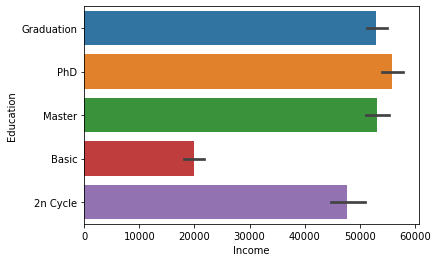

In [43]:
sns.barplot( x="Income",y="Education",data=df_n)


<AxesSubplot:xlabel='Expenses', ylabel='Education'>

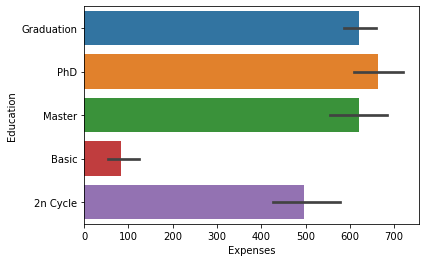

In [44]:
sns.barplot( x="Expenses",y="Education",data=df_n)


##### Phd holder, masters and graduate earns more and spent more

<AxesSubplot:xlabel='Age', ylabel='Expenses'>

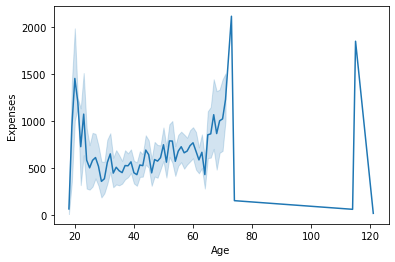

In [45]:
sns.lineplot(x="Age", y="Expenses", data=df_n)

- Age between 20 to 30 and 60 to 70 spent more money

<AxesSubplot:xlabel='Campaign', ylabel='Expenses'>

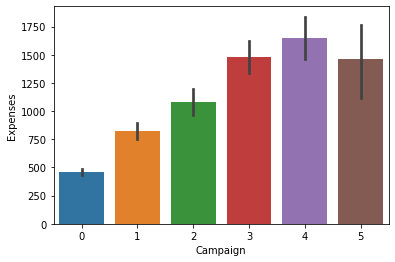

In [46]:
sns.barplot( x="Campaign",y="Expenses",data=df_n)


<AxesSubplot:xlabel='Marital_Status', ylabel='Complain'>

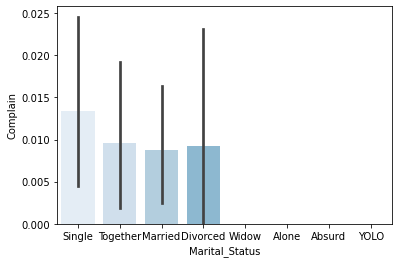

In [47]:
sns.barplot(x = 'Marital_Status',y = 'Complain',data = df_n, palette = "Blues")


<AxesSubplot:xlabel='Kidhome', ylabel='MntWines'>

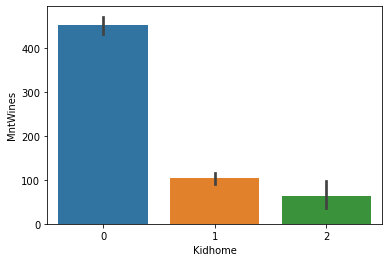

In [48]:
sns.barplot(x='Kidhome', y="MntWines",  data=df_n)


<AxesSubplot:xlabel='Teenhome', ylabel='MntWines'>

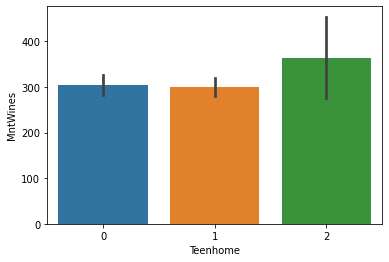

In [49]:
sns.barplot(x='Teenhome', y="MntWines",  data=df_n)

<AxesSubplot:xlabel='Kidhome', ylabel='MntFruits'>

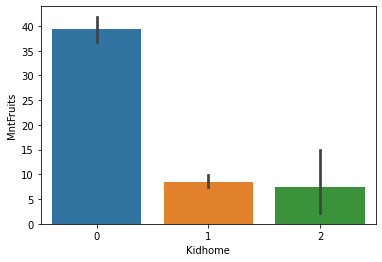

In [50]:
sns.barplot(x='Kidhome', y="MntFruits",  data=df_n)

<AxesSubplot:xlabel='Teenhome', ylabel='MntFruits'>

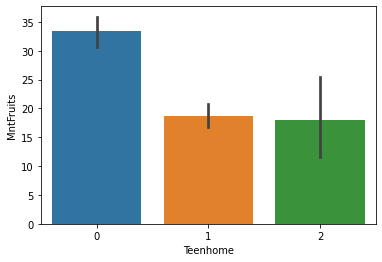

In [51]:
sns.barplot(x='Teenhome', y="MntFruits",  data=df_n)

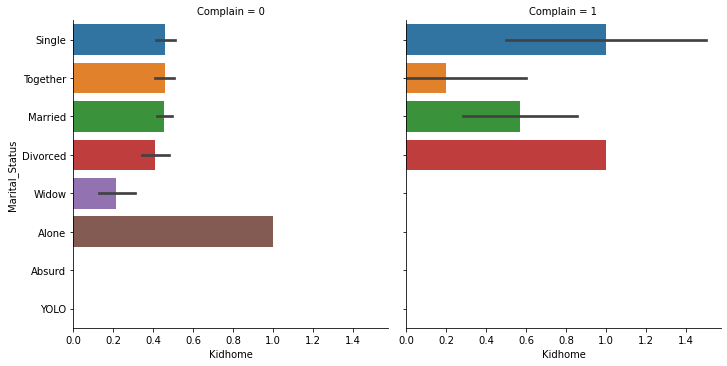

In [52]:
sns.catplot(x='Kidhome', y='Marital_Status', col='Complain', data=df_n, kind='bar')

##### Single and Divorcies have registered more complaints 

<AxesSubplot:>

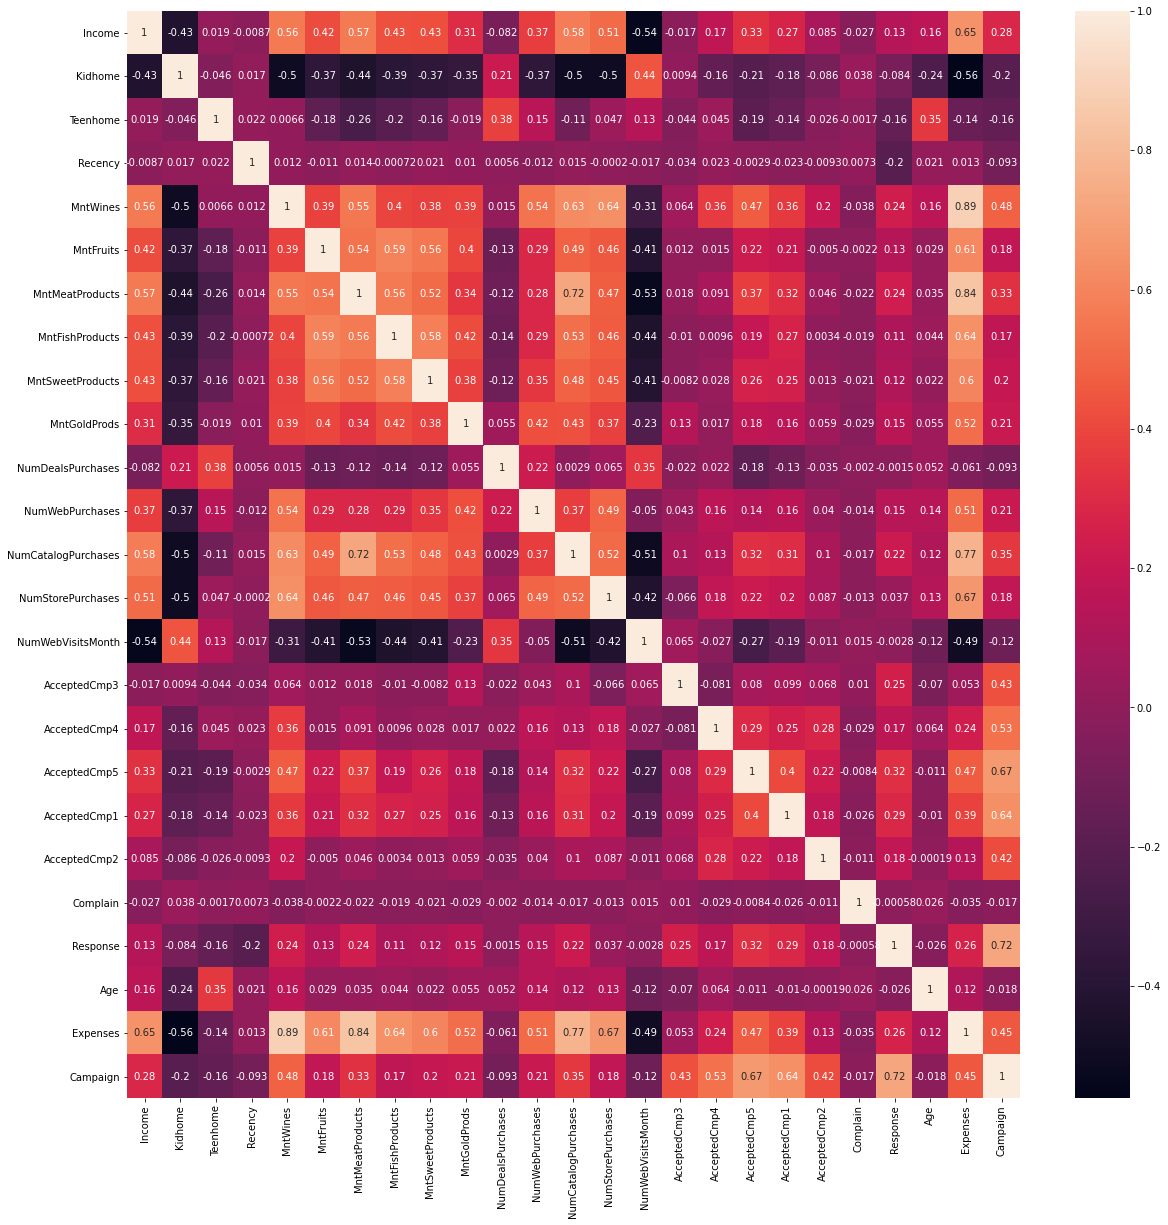

In [53]:
# Corelation Analysis

plt.figure(figsize=(20,20))

sns.heatmap(df_n.corr(), annot=True) 


## Outlier detection and handeling

<AxesSubplot:>

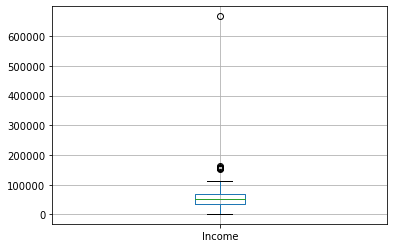

In [54]:
 df_n.boxplot(column="Income")

<AxesSubplot:>

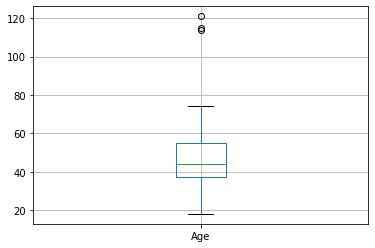

In [55]:
 df_n.boxplot(column="Age")

In [56]:

Q1=np.percentile(df_n["Income"],25, interpolation="midpoint")
Q3=np.percentile(df_n["Income"],75, interpolation="midpoint")
IQR_income=Q3-Q1
upper_bound=Q3+1.5*IQR_income
lower_bound=Q1-1.5*IQR_income
df_n["Income"]=np.where(df_n["Income"]<lower_bound, df_n["Income"].median(), df_n["Income"])
df_n["Income"]=np.where(df_n["Income"]>upper_bound, df_n["Income"].median(), df_n["Income"])

In [57]:

Q1=np.percentile(df_n["Age"],25, interpolation="midpoint")
Q3=np.percentile(df_n["Age"],75, interpolation="midpoint")
IQR_Age=Q3-Q1
upper_bound=Q3+1.5*IQR_Age
lower_bound=Q1-1.5*IQR_Age
df_n["Age"]=np.where(df_n["Age"]<lower_bound, df_n["Age"].median(), df_n["Age"])
df_n["Age"]=np.where(df_n["Age"]>upper_bound, df_n["Age"].median(), df_n["Age"])

<AxesSubplot:>

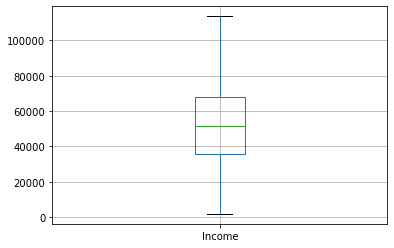

In [58]:
df_n.boxplot(column="Income")

<AxesSubplot:>

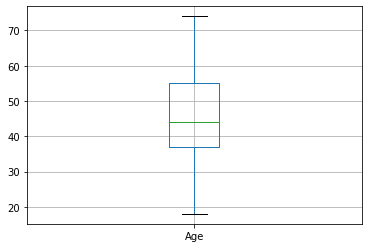

In [59]:
 df_n.boxplot(column="Age")